We demonstrate a robustness issue with using a squared error loss for classification problems through the use of a linear regression model in two dimensions.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression

First generate at dataset with 2 classes. 
Also, create a second dataset with outliers applied to one of the classes.

In [2]:
np.random.seed(42)
# get the first class distribution
x1 = np.random.multivariate_normal(mean=[-1,1], cov=0.2*np.array([[6, 5], [5, 6]]), size=50)
# get the second class distribution
x2 = np.random.multivariate_normal(mean=[1,-1], cov=0.2*np.array([[6, 5], [5, 6]]), size=40)
# combine the vectors to give the full training set
x = np.vstack([x1, x2])
y = np.concatenate([-np.ones(x1.shape[0]), np.ones(x2.shape[0])])
# create a second dataset with outliers in the second class
x_outliers = np.vstack([x, np.random.multivariate_normal(mean=[8, -6], cov=np.identity(2), size=10)])
y_outliers = np.concatenate([y, np.ones(10)])
# specify a mesh to use for plotting decision boundaries
x_min, x_max = x_outliers[:, 0].min() - .5, x_outliers[:, 0].max() + .5
y_min, y_max = x_outliers[:, 1].min() - .5, x_outliers[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Train a linear classifier to plot the learned decision boundary on the dataset with no outliers.

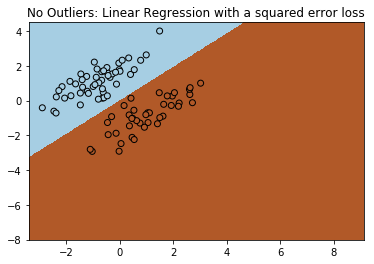

In [3]:
# initialize and fit the model
l2_reg = LinearRegression()
l2_reg.fit(x, y)
# Put the result into a color plot
Z = np.sign(l2_reg.predict(np.c_[xx.ravel(), yy.ravel()])) # threshold the results
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired);
plt.title("No Outliers: Linear Regression with a squared error loss");

Evidently, the classifier performs well.

Now consider a linear regression model on the dataset with a few outliers added to the dataset, retrain, and plot the decision boundary.

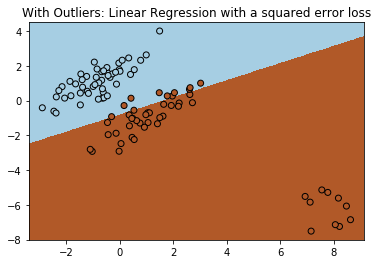

In [4]:
# initialize and fit the model
l2_reg = LinearRegression()
l2_reg.fit(x_outliers, y_outliers)
# Put the result into a color plot
Z = np.sign(l2_reg.predict(np.c_[xx.ravel(), yy.ravel()])) # threshold the results
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(x_outliers[:, 0], x_outliers[:, 1], c=y_outliers, edgecolors='k', cmap=plt.cm.Paired);
plt.title("With Outliers: Linear Regression with a squared error loss");

Although the original decision boundary would have still classified the dataset correctly,
with these few extra outliers added to the dataset, the model no longer correctly classifies the training examples.
This is because the squared error loss penalizes predictions that are "too correct" in that they lie a long way on the correct side of the decision boundary.

Using a logistic regression model (not yet covered), we can correctly identify the decision boundary even with the ouliers.

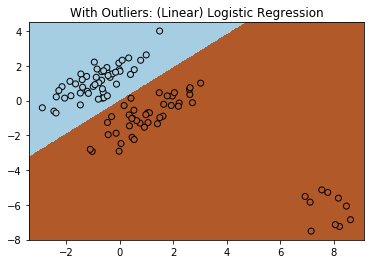

In [5]:
# initialize and fit the model
logistic_reg = LogisticRegression(solver='lbfgs')
logistic_reg.fit(x_outliers, y_outliers)
# Plot the decision boundary
Z = logistic_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(x_outliers[:, 0], x_outliers[:, 1], c=y_outliers, edgecolors='k', cmap=plt.cm.Paired)
plt.title("With Outliers: (Linear) Logistic Regression");